<a href="https://colab.research.google.com/github/kahhotan/Coding-Projects/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VIX Time Series

This project attempts to predict the movement of VIX, using various time series models. The dataset is taken from FRED (Federal Reserve Economic Data), so minimal cleaning is expected. Data accuracy can be assumed to be high. We have extracted data from the year 1990. However, the calculation for VIX changed in 2003, therefore we would only use data from 2004 onwards.

Our approach to this problem would include

1. Data Visualisation
2. Stationarity Test
3. Model Building
4. Prediction/Forecasting






Loading Libraries

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from matplotlib import pyplot

%matplotlib inline

Load Dataset

In [ ]:
#Load dataframe
vix = pd.read_excel('/content/sample_data/Time Series Data.xlsx', sheet_name ='VIX', index_col='Date', parse_dates=True)
vix = vix.iloc[:-5] #leave the last 5 days out, as we will use them for forecasting/prediction

In [ ]:
vix.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [ ]:
vix.index = pd.to_datetime(vix.index)

In [ ]:
vix.sort_index(inplace = True)

In [ ]:
#vix.index = vix.index.to_period('D')

Data Exploration and Preprocessing

In [ ]:
#Data exploration
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0


In [ ]:
vix = vix.loc['2004':] #Select 2004 onwards due to calculation changes in VIX

In [ ]:
vix.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,17.959999,18.68,17.540001,18.219999,18.219999,0
2004-01-05,18.450001,18.49,17.440001,17.490000,17.490000,0
2004-01-06,17.660000,17.67,16.190001,16.730000,16.730000,0
2004-01-07,16.719999,16.75,15.500000,15.500000,15.500000,0
2004-01-08,15.420000,15.68,15.320000,15.610000,15.610000,0


In [ ]:
vix.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4401.000000,4401.000000,4401.000000,4401.000000,4401.000000,4401.0
mean,19.034213,19.966230,18.106596,18.920123,18.920123,0.0
std,9.169954,9.857764,8.450183,9.121992,9.121992,0.0
min,9.010000,9.310000,8.560000,9.140000,9.140000,0.0
25%,13.230000,13.750000,12.750000,13.150000,13.150000,0.0
50%,16.190001,16.900000,15.460000,16.090000,16.090000,0.0
75%,21.969999,23.010000,20.879999,21.639999,21.639999,0.0
max,82.690002,89.529999,72.760002,82.690002,82.690002,0.0


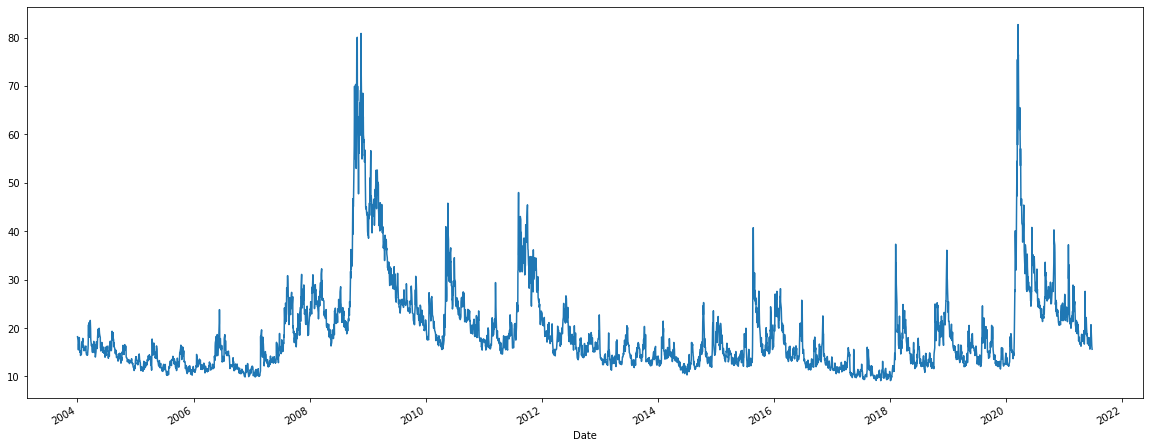

In [ ]:
vix ['Adj Close'].plot(figsize = (20,8))

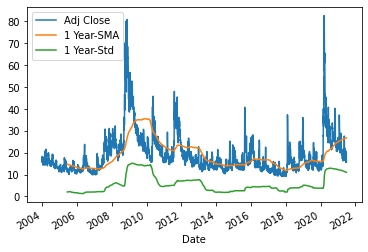

In [ ]:
#Determine rolling statistics to check for stationarity

vix['1 Year-SMA'] = vix['Adj Close'].rolling(window=365).mean()
vix['1 Year-Std'] = vix['Adj Close'].rolling(window=365).std()

vix[['Adj Close','1 Year-SMA','1 Year-Std']].plot();

For a time series to be stationary, the mean and variance has to be constant or close to constant. From the rolling statistics model, we can see that the series is non-stationary

# Smoothing Methods

For Exponential Smoothing Methods, the series does not have to be stationary. As such, we can proceed to explore some exponential smoothing methods.

Single Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 5
alpha = 2/(span+1)

vix['Single Exponential Smoothing'] = SimpleExpSmoothing(vix['Adj Close']).fit(smoothing_level = alpha, optimized = False).fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Double Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

vix['Double Exponential Smoothing (Multiplicative)'] = ExponentialSmoothing(vix['Adj Close'], trend='mul').fit().fittedvalues
vix['Double Exponential Smoothing (Additive)'] = ExponentialSmoothing(vix['Adj Close'], trend='add').fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Triple Exponential Smoothing

In [ ]:
#Triple Exponential Smoothing

vix['Triple Exponential Smoothing (Multiplicative)'] = ExponentialSmoothing(vix['Adj Close'],trend = 'mul',seasonal = 'add',seasonal_periods = 4, damped = True).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


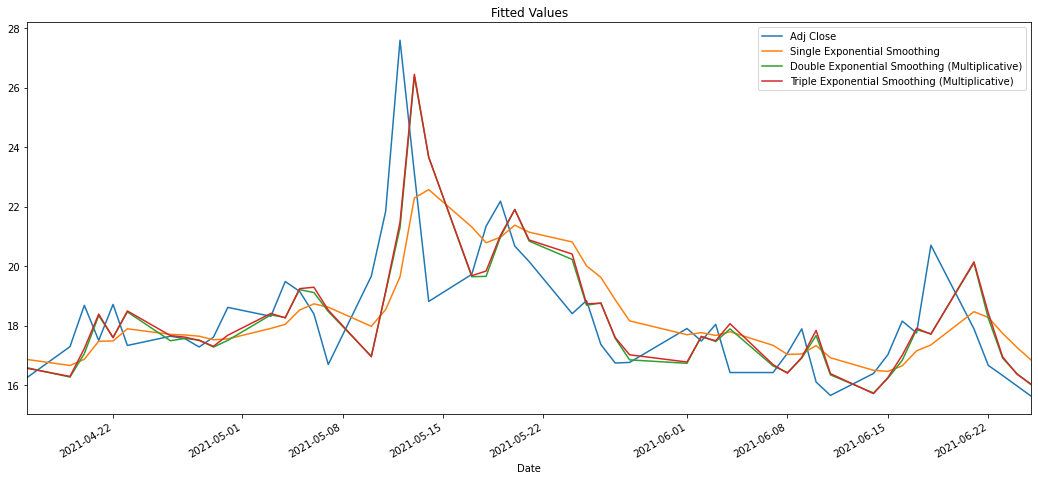

In [ ]:
vix[['Adj Close', 'Single Exponential Smoothing', 'Double Exponential Smoothing (Multiplicative)', 'Triple Exponential Smoothing (Multiplicative)']].iloc[-50:].plot(figsize=(18,8), title='Fitted Values').autoscale(axis='x',tight=True)


Forecasting 5 days forward

In [ ]:
forecast_data = pd.read_excel('/content/sample_data/Time Series Data.xlsx', sheet_name ='VIX', parse_dates=True, index_col='Date')

In [ ]:
train = forecast_data.iloc[:-5] 
test = forecast_data.iloc[-5:] #forecast 5 days ahead
pred = test.copy()
pred['Actual Value'] = pred['Adj Close']

In [ ]:
model = SimpleExpSmoothing(np.asarray(train['Adj Close']))
model2 = ExponentialSmoothing(np.asarray(train['Adj Close']), trend='mul')
model3 = ExponentialSmoothing(np.asarray(train['Adj Close']),trend='mul',seasonal='add',seasonal_periods=4, damped=True)

In [ ]:
fit1 = model.fit(smoothing_level=alpha,optimized=False)
fit2 = model2.fit()
fit3 = model3.fit()

In [ ]:
pred1 = fit1.forecast(5)
pred2 = fit2.forecast(5)
pred3 = fit3.forecast(5)

In [ ]:
pred['Single Exponential Smoothing Forecast'] = pred1.tolist()
pred['Double Exponential Smoothing (Multiplicative) Forecast'] = pred2.tolist()
pred['Triple Exponential Smoothing (Multiplicative) Forecast'] = pred3.tolist()

In [ ]:
df_filter = forecast_data.iloc[-80:, :] 
mergedDf = pd.merge(df_filter, pred, on='Date', how='left')
mergedDf = mergedDf[['Adj Close_x', 'Single Exponential Smoothing Forecast', 'Double Exponential Smoothing (Multiplicative) Forecast','Triple Exponential Smoothing (Multiplicative) Forecast']]
mergedDf = mergedDf.rename({'Adj Close_x': 'Actual Value'}, axis=1)

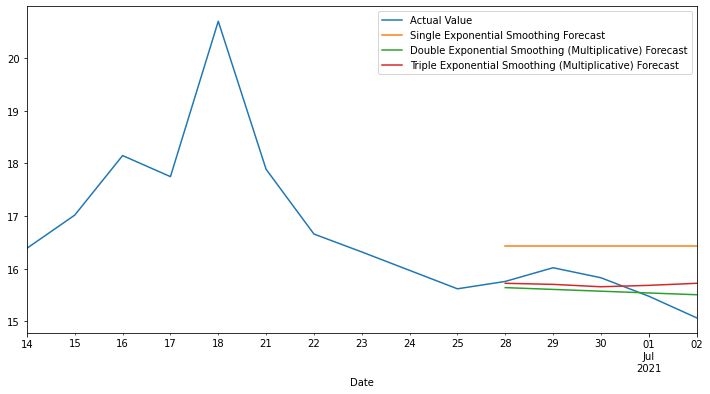

In [ ]:
mergedDf[['Actual Value','Single Exponential Smoothing Forecast','Double Exponential Smoothing (Multiplicative) Forecast','Triple Exponential Smoothing (Multiplicative) Forecast']].iloc[-15:].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(pred['Actual Value'], pred['Single Exponential Smoothing Forecast'])
mae = mean_absolute_error(pred['Actual Value'], pred['Single Exponential Smoothing Forecast'])
rmse = sqrt(mse)
print('RMSE (Single Exponential Smoothing): %f' % rmse)
print('MAE (Single Exponential Smoothing): %f' % mae)

mse = mean_squared_error(pred['Actual Value'], pred['Double Exponential Smoothing (Multiplicative) Forecast'])
mae = mean_absolute_error(pred['Actual Value'], pred['Double Exponential Smoothing (Multiplicative) Forecast'])
rmse = sqrt(mse)
print('RMSE (Double Exponential Smoothing): %f' % rmse)
print('MAE (Double Exponential Smoothing): %f' % mae)

mse = mean_squared_error(pred['Actual Value'], pred['Triple Exponential Smoothing (Multiplicative) Forecast'])
mae = mean_absolute_error(pred['Actual Value'], pred['Triple Exponential Smoothing (Multiplicative) Forecast'])
rmse = sqrt(mse)
print('RMSE (Triple Exponential Smoothing): %f' % rmse)
print('MAE (Triple Exponential Smoothing): %f' % mae)

RMSE (Single Exponential Smoothing): 0.862126
MAE (Single Exponential Smoothing): 0.796395
RMSE (Double Exponential Smoothing): 0.297746
MAE (Double Exponential Smoothing): 0.256527
RMSE (Triple Exponential Smoothing): 0.346701
MAE (Triple Exponential Smoothing): 0.276460


# Stationarity

Moving Average Smoothing

Moving Average Smoothing works best on a stationary time series. But based on the rolling statistic above, the series is non-stationary. We therefore have to transform the time series to a stationary one using different techniques.

Log Transformation

In [ ]:
from scipy.stats import boxcox

vix['Log Adj Close'] = boxcox(vix['Adj Close'], lmbda=0.0)

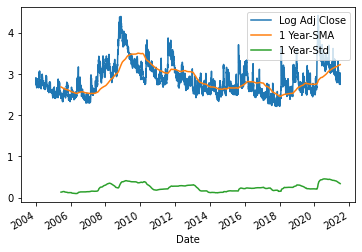

In [ ]:
#Rolling statics for Log Time Series
vix['1 Year-SMA'] = vix['Log Adj Close'].rolling(window=365).mean()
vix['1 Year-Std'] = vix['Log Adj Close'].rolling(window=365).std()

vix[['Log Adj Close','1 Year-SMA','1 Year-Std']].plot();

Again, from the rolling statistics, we can tell that the time series is not stationary, even though it looks much better compared to previously. We will do a first order differencing.

1st Order Differencing

In [ ]:
vix['Log Diff Adj Close'] = vix['Log Adj Close'] - vix['Log Adj Close'].shift(1)

In [ ]:
vix.head()

,Open,High,Low,Close,Adj Close,Volume,1 Year-SMA,1 Year-Std,Single Exponential Smoothing,Double Exponential Smoothing (Multiplicative),Double Exponential Smoothing (Additive),Triple Exponential Smoothing (Multiplicative),Log Adj Close,Log Diff Adj Close
Date,,,,,,,,,,,,,,
2004-01-02,17.959999,18.68,17.540001,18.219999,18.219999,0,NaN,NaN,18.219999,18.171505,18.167388,16.971451,2.902520,NaN
2004-01-05,18.450001,18.49,17.440001,17.490000,17.490000,0,NaN,NaN,18.219999,18.162450,18.210347,18.158208,2.861629,-0.040891
2004-01-06,17.660000,17.67,16.190001,16.730000,16.730000,0,NaN,NaN,17.976666,17.565488,17.622159,17.621989,2.817204,-0.044426
2004-01-07,16.719999,16.75,15.500000,15.500000,15.500000,0,NaN,NaN,17.561111,16.837165,16.893681,16.862476,2.740840,-0.076363
2004-01-08,15.420000,15.68,15.320000,15.610000,15.610000,0,NaN,NaN,16.874074,15.701671,15.755694,15.770366,2.747912,0.007072


In [ ]:
vix = vix.iloc[1: , :] # Remove first row in 'Log Diff Adj Close colunm which contains NaN

In [ ]:
vix.head()

,Open,High,Low,Close,Adj Close,Volume,1 Year-SMA,1 Year-Std,Single Exponential Smoothing,Double Exponential Smoothing (Multiplicative),Double Exponential Smoothing (Additive),Triple Exponential Smoothing (Multiplicative),Log Adj Close,Log Diff Adj Close
Date,,,,,,,,,,,,,,
2004-01-05,18.450001,18.490000,17.440001,17.49,17.49,0,NaN,NaN,18.219999,18.162450,18.210347,18.158208,2.861629,-0.040891
2004-01-06,17.660000,17.670000,16.190001,16.73,16.73,0,NaN,NaN,17.976666,17.565488,17.622159,17.621989,2.817204,-0.044426
2004-01-07,16.719999,16.750000,15.500000,15.50,15.50,0,NaN,NaN,17.561111,16.837165,16.893681,16.862476,2.740840,-0.076363
2004-01-08,15.420000,15.680000,15.320000,15.61,15.61,0,NaN,NaN,16.874074,15.701671,15.755694,15.770366,2.747912,0.007072
2004-01-09,16.150000,16.879999,15.570000,16.75,16.75,0,NaN,NaN,16.452716,15.584917,15.636730,15.798690,2.818398,0.070487


In [ ]:
train = vix.iloc[:-5] 
test = vix.iloc[-5:] #forecast 5 days ahead

train.index=train.index.to_period('D')
test.index=test.index.to_period('D')

In [ ]:
test.head(10)

,Open,High,Low,Close,Adj Close,Volume,1 Year-SMA,1 Year-Std,Single Exponential Smoothing,Double Exponential Smoothing (Multiplicative),Double Exponential Smoothing (Additive),Triple Exponential Smoothing (Multiplicative),Log Adj Close,Log Diff Adj Close
Date,,,,,,,,,,,,,,
2021-06-21,21.740000,21.820000,17.809999,17.889999,17.889999,0,3.221247,0.347550,18.465626,20.103311,20.164422,20.139350,2.884242,-0.145892
2021-06-22,17.910000,18.320000,15.760000,16.660000,16.660000,0,3.222025,0.346312,18.273750,18.244582,18.307279,18.419673,2.813011,-0.071231
2021-06-23,16.250000,16.840000,14.860000,16.320000,16.320000,0,3.222743,0.345144,17.735834,16.903555,16.962220,16.947149,2.792391,-0.020619
2021-06-24,15.990000,16.049999,14.190000,15.970000,15.970000,0,3.223454,0.343940,17.263889,16.382454,16.437826,16.362672,2.770712,-0.021679
2021-06-25,16.040001,16.170000,15.210000,15.620000,15.620000,0,3.224088,0.342844,16.832593,16.002280,16.055830,16.024873,2.748552,-0.022160


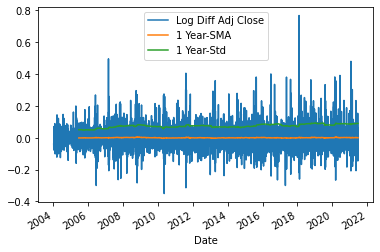

In [ ]:
vix['1 Year-SMA'] = vix['Log Diff Adj Close'].rolling(window=365).mean()
vix['1 Year-Std'] = vix['Log Diff Adj Close'].rolling(window=365).std()

vix[['Log Diff Adj Close','1 Year-SMA','1 Year-Std']].plot();

ADF test

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string()) # .to_string() removes the line "dtype: float64"
        
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(vix['Log Diff Adj Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -23.834381
p-value                    0.000000
# lags used                9.000000
# observations          4390.000000
critical value (1%)       -3.431840
critical value (5%)       -2.862199
critical value (10%)      -2.567121
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


ACF & PACF

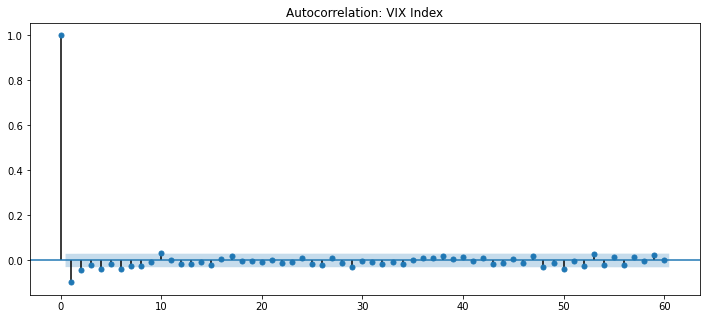

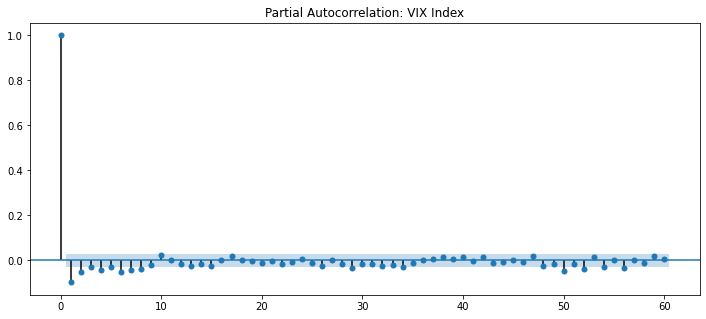

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

mpl.rcParams['figure.figsize'] = (12,5)

title1 = 'Autocorrelation: VIX Index'
title2 = 'Partial Autocorrelation: VIX Index'
lags = 60
plot_acf(vix['Log Diff Adj Close'],title=title1,lags=lags);
plot_pacf(vix['Log Diff Adj Close'],title=title2,lags=lags);

# ARIMA

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [ ]:
model = ARIMA(train['Log Diff Adj Close'],order=(6,0,4))
ARIMAModel = model.fit()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
ARIMAPrediction = ARIMAModel.predict(start=start, end=end, dynamic=False).rename('Auto ARIMA (6,0,4) Prediction')

In [ ]:
ARIMAPrediction = np.exp(ARIMAPrediction)

In [ ]:
pred['ARIMA(6,0,4)'] = list(ARIMAPrediction)

In [ ]:
mse = mean_squared_error(pred['Actual Value'], pred['ARIMA(6,0,4)'])
rmse = sqrt(mse)
mae = mean_absolute_error(pred['Actual Value'], pred['ARIMA(6,0,4)'])
print('RMSE ARIMA(6,0,4): %f' % rmse)
print('MAE ARIMA(6,0,4): %f' % mae)

RMSE ARIMA(6,0,4): 14.641745
MAE ARIMA(6,0,4): 14.637971
